In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re

pd.set_option('max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 12, 10

In [125]:
df = pd.read_csv('crime.txt')
df.columns = ['agency', 'crime', 'time', 'addr', 'zip', 'community']
df['crime'] = df['crime'].astype(str)
df.head()

,agency,crime,time,addr,zip,community
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30:00,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO


In [126]:
[x for x in df.crime.unique() if 'theft' in str(x).lower()]

['GRAND THEFT FROM PERSON',
 "TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT (F)",
 'PETTY THEFT(Shoplift) (M)',
 'PETTY THEFT',
 'GRAND THEFT/UNSPECIFIED',
 "TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT",
 'PETTY THEFT(from Coin Oper Machine) (M)',
 'PETTY THEFT(from Building) (M)',
 'PETTY THEFT(All Other Larceny) (M)',
 'GRAND THEFT (Theft From Mot Veh) (F)',
 'GRAND THEFT:MONEY/LABOR/PROPERTY (F)',
 'PETTY THEFT / THEFT OF PERSONAL PROPERTY / SHOPLIFT',
 'THEFT BY USE OF ACCESS CARD INFORMATION [OVER $950] (F)',
 'PETTY THEFT(from Veh) (M)',
 'THEFT BY USE OF CREDIT CARD (UNDER $950)',
 'GRAND THEFT (Theft From Building) (F)',
 'PETTY THEFT(Mot Veh Parts) (M)',
 'GRAND THEFT (Theft of Mot Veh Parts/Acc) (F)',
 'THEFT BY USE OF CREDIT CARD (OVER $950)',
 'GRAND THEFT:MONEY/LABOR/PROPERTY OVER $950',
 'GRAND THEFT (Mot Veh Theft) (F)',
 'ATTEMPTED PETTY THEFT',
 'PETTY THEFT(Purse Snatch) (M)',
 'THEFT BY USE OF ACCESS CARD INFORMATION [$950 OR LESS] (M)',
 'THEFT (M)',
 'GRAND THE

In [148]:
from datetime import datetime


def time_fix(row):
    t = str(row['time'])
    return datetime.strptime(t, "%m/%d/%Y %H:%M:%S")


df['time_fix'] = df.apply(time_fix, axis=1)


def doy(row):
    d = row['time_fix']
    return d.timetuple().tm_yday


df['doy'] = df.apply(doy, axis=1)

In [147]:
dto = datetime.strptime('2/3/2018 16:30:00', "%m/%d/%Y %H:%M:%S")
dto.weekday()
# datetime.now().timetuple().tm_yday
dto.timetuple().tm_yday

34

In [149]:
def type_find(row):
    t = str(row['crime']).lower()
    # print(t)
    if 'firearm' in t or 'ammunition' in t or 'shoot' in t:
        return 'gun'
    if 'controlled' in t or 'contr' in t or 'drug' in t or 'paraphernalia' in t or 'cntl' in t:
        return 'drug'
    if 'theft' in t or 'burglary' in t or 'robbery' in t or 'obtain money' in t:
        return 'theft'
    if 'drunk' in t or 'liquor' in t or 'open container' in t or 'alcohol' in t or 'alc' in t:
        return 'alcohol'
    if 'marijuana' in t or 'cannabis' in t or 'weed' in t:
        return 'weed'
    if 'weapon' in t or 'metal knuckles' in t or 'leaded cane' in t or 'shuriken' in t or 'knife' in t or 'dagger' in t:
        return 'weapons'
    if 'sex' in t or 'rape' in t or 'intimate' in t or 'indecent exposure' in t or 'obscene' in t or 'prostitution' in t:
        return 'sexual'
    if 'assault' in t or 'battery' in t:
        return 'assault'
    if 'resist' in t:
        return 'resisting'
    if 'shoplifting' in t:
        return 'shoplifting'
    if 'fraud' in t or 'defraud' in t or 'personate' in t:
        return 'fraud'
    if 'vandalism' in t:
        return 'vandalism'
    if 'elder' in t:
        return 'elder abuse'
    if 'get credit' in t or 'personal identific' in t:
        return 'identity theft'
    if 'terrorize' in t or 'terrorist' in t:
        return 'terrorism'
    if 'animal' in t:
        return 'animal'
    if 'child' in t or 'minor' in t:
        return 'child'
    if 'tamper' in t or 'carjacking' in t:
        return 'vehicle tampering'
    if 'arson' in t:
        return 'arson'
    else:
        return 'none'


df['type'] = df.apply(type_find, axis=1)

In [143]:
# df[df['type'] == 'none'].reset_index()
len(df[df['type'] == 'none'].reset_index())
# df.head(30)
# pd.value_counts(df[df['type'] == 'none'].reset_index()['crime'])
# pd.value_counts(df['crime'])

907

In [150]:
df.head()

,agency,crime,time,addr,zip,community,type,time_fix,doy
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30:00,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO,theft,2018-01-03 16:30:00,3
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,alcohol,2017-09-23 18:28:00,266
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO,drug,2017-10-06 08:48:00,279
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,drug,2017-10-11 19:45:00,284
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO,drug,2017-10-21 23:36:00,294


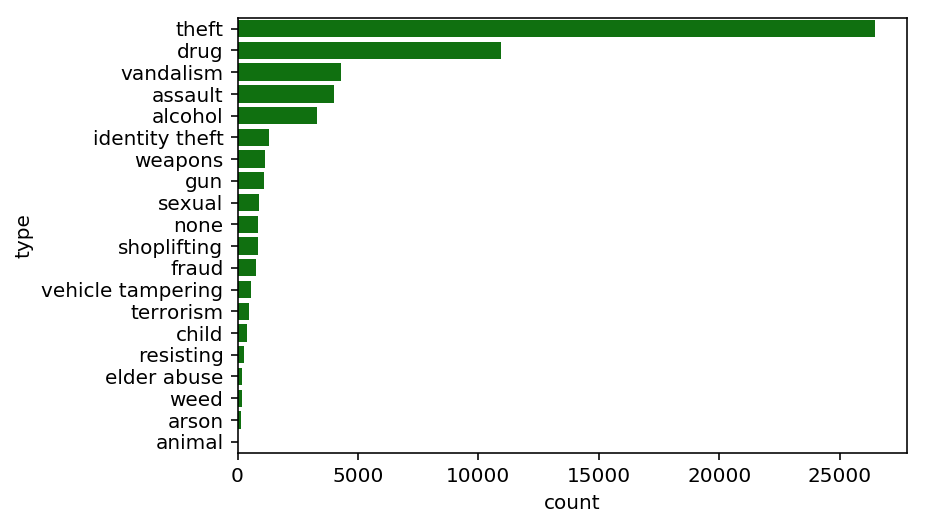

In [137]:
sns.countplot(y='type', data=df.dropna(), order=df['type'].value_counts().index, color='green')

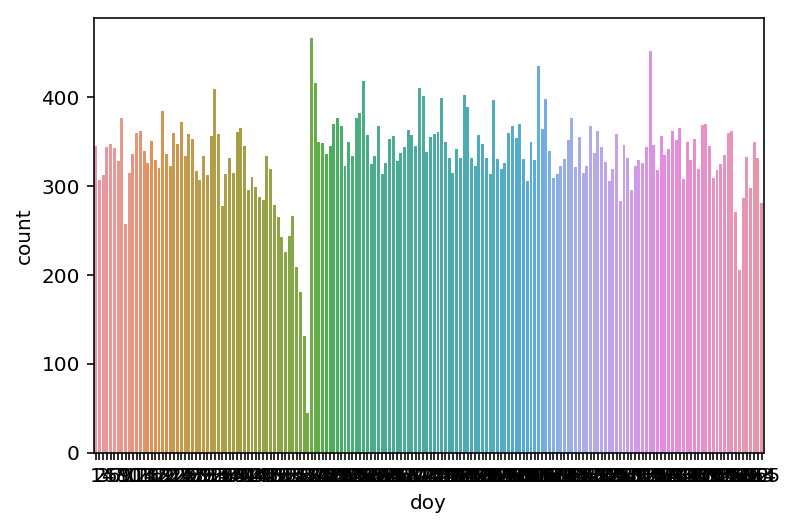

In [151]:
sns.countplot(x='doy', data=df)